<font color=red size=6>PREDICTIONS</font>

**Pere Mayol Carbonell, NIU:1669503** <br>

In [177]:
#import everything we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')#just to make the plots look better.

#regarding the training and validation of thje data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



In [178]:
#Read the data and print the first 10 elements to check its okay.
data_EE = pd.read_csv('/content/Copy of Consum energia Q 2018-2023 horari.csv')
data_EE.head(200)

,Date,Hour,Q-Enginyeria-Total [kWh]
0,1/1/2018,00:00,177.00
1,1/1/2018,01:00,177.44
2,1/1/2018,02:00,176.57
3,1/1/2018,03:00,174.98
4,1/1/2018,04:00,174.51
...,...,...,...
195,1/9/2018,03:00,192.05
196,1/9/2018,04:00,196.69
197,1/9/2018,05:00,219.47
198,1/9/2018,06:00,332.88


In [179]:
data_EE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53629 entries, 0 to 53628
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      53629 non-null  object 
 1   Hour                      53629 non-null  object 
 2   Q-Enginyeria-Total [kWh]  53629 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [180]:
data_EE.head()

,Date,Hour,Q-Enginyeria-Total [kWh]
0,1/1/2018,00:00,177.00
1,1/1/2018,01:00,177.44
2,1/1/2018,02:00,176.57
3,1/1/2018,03:00,174.98
4,1/1/2018,04:00,174.51


In [181]:
#For plotting Energy Expenditure over the years and see the overall behaviour.
data_EE['DateTime'] = pd.to_datetime(data_EE['Date'] + ' ' + data_EE['Hour']) #Join the Date and Hour to represent the expenditure over Time

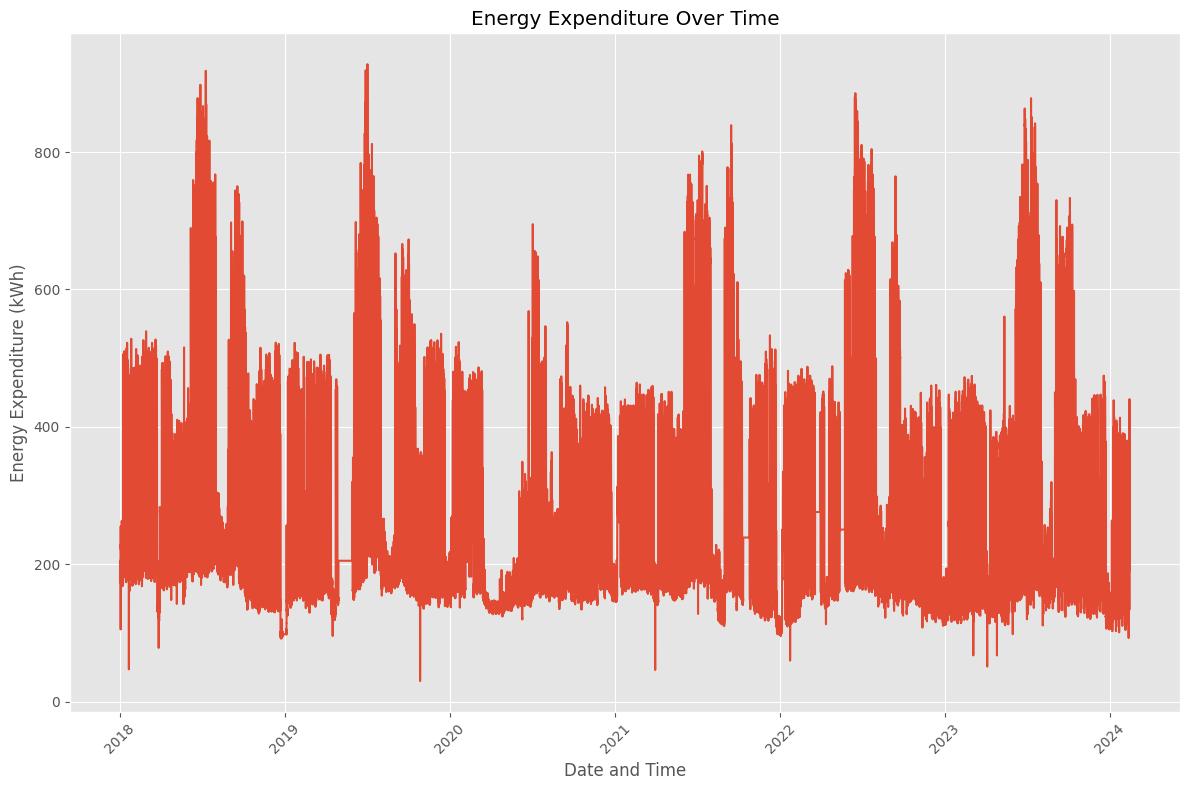

In [182]:
plt.figure(figsize=(12, 8))
plt.plot(data_EE['DateTime'], data_EE['Q-Enginyeria-Total [kWh]'])
plt.title('Energy Expenditure Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Energy Expenditure (kWh)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [183]:
data_EE.head(100)

,Date,Hour,Q-Enginyeria-Total [kWh],DateTime
0,1/1/2018,00:00,177.00,2018-01-01 00:00:00
1,1/1/2018,01:00,177.44,2018-01-01 01:00:00
2,1/1/2018,02:00,176.57,2018-01-01 02:00:00
3,1/1/2018,03:00,174.98,2018-01-01 03:00:00
4,1/1/2018,04:00,174.51,2018-01-01 04:00:00
...,...,...,...,...
95,1/4/2018,23:00,186.89,2018-01-04 23:00:00
96,1/5/2018,00:00,183.08,2018-01-05 00:00:00
97,1/5/2018,01:00,182.06,2018-01-05 01:00:00
98,1/5/2018,02:00,179.85,2018-01-05 02:00:00


In [184]:
data_EE['Date'] = pd.to_datetime(data_EE['Date'], format='%m/%d/%Y')
#Fix the Date and Hour format so its usable
data_EE['Hour'] = data_EE['Hour'].apply(lambda x: ''.join(x.split(':')))
data_EE['Date'] = data_EE['Date'].apply(lambda x: x.strftime('%m%d%Y'))
data_EE.head()

,Date,Hour,Q-Enginyeria-Total [kWh],DateTime
0,01012018,0000,177.00,2018-01-01 00:00:00
1,01012018,0100,177.44,2018-01-01 01:00:00
2,01012018,0200,176.57,2018-01-01 02:00:00
3,01012018,0300,174.98,2018-01-01 03:00:00
4,01012018,0400,174.51,2018-01-01 04:00:00


In [185]:
#To create a new feature based on which day of the week it was at each date.
data_EE['Date'] = pd.to_datetime(data_EE['Date'], format='%m%d%Y')

data_EE['Day_of_Week'] = data_EE['Date'].dt.dayofweek

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_EE['Day_of_Week'] = data_EE['Day_of_Week'].map(lambda x: day_names[x])

In [186]:
#Change day of the week from categorical to an integrer depending on which day it is.
data_EE['Day_of_Week'] = pd.factorize(data_EE['Day_of_Week'])[0] + 1
data_EE['Day'] = data_EE['Date'].dt.day
data_EE['Month'] = data_EE['Date'].dt.month
data_EE['Year'] = data_EE['Date'].dt.year

In [187]:
def get_season(month):
    if month in [12, 1, 2]:
        return 1
    elif month in [3, 4, 5]:
        return 2
    elif month in [6, 7, 8]:
        return 3
    else:
        return 4

data_EE['Season'] = data_EE['Month'].apply(get_season)

In [188]:
data_EE.head(100)

,Date,Hour,Q-Enginyeria-Total [kWh],DateTime,Day_of_Week,Day,Month,Year,Season
0,2018-01-01,0000,177.00,2018-01-01 00:00:00,1,1,1,2018,1
1,2018-01-01,0100,177.44,2018-01-01 01:00:00,1,1,1,2018,1
2,2018-01-01,0200,176.57,2018-01-01 02:00:00,1,1,1,2018,1
3,2018-01-01,0300,174.98,2018-01-01 03:00:00,1,1,1,2018,1
4,2018-01-01,0400,174.51,2018-01-01 04:00:00,1,1,1,2018,1
...,...,...,...,...,...,...,...,...,...
95,2018-01-04,2300,186.89,2018-01-04 23:00:00,4,4,1,2018,1
96,2018-01-05,0000,183.08,2018-01-05 00:00:00,5,5,1,2018,1
97,2018-01-05,0100,182.06,2018-01-05 01:00:00,5,5,1,2018,1
98,2018-01-05,0200,179.85,2018-01-05 02:00:00,5,5,1,2018,1


Train X shape: (32351, 6) and Train X:        Year  Day  Month  Day_of_Week  Season  Hour
0      2018    1      1            1       1  0000
1      2018    1      1            1       1  0100
2      2018    1      1            1       1  0200
3      2018    1      1            1       1  0300
4      2018    1      1            1       1  0400
...     ...  ...    ...          ...     ...   ...
32346  2021    9      9            4       4  1900
32347  2021    9      9            4       4  2000
32348  2021    9      9            4       4  2100
32349  2021    9      9            4       4  2200
32350  2021    9      9            4       4  2300

[32351 rows x 6 columns]
Train Y shape: (32351, 1) and Train Y:        Q-Enginyeria-Total [kWh]
0                        177.00
1                        177.44
2                        176.57
3                        174.98
4                        174.51
...                         ...
32346                    528.97
32347                    365

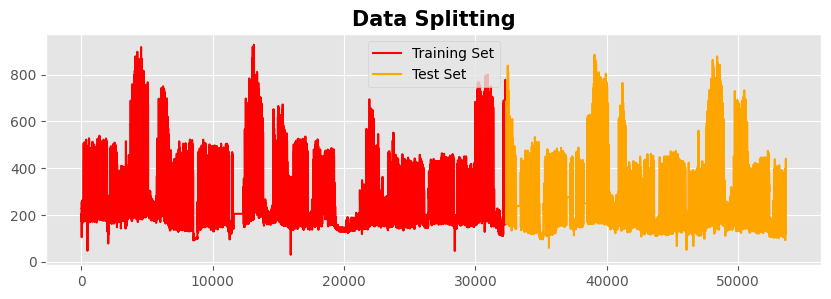

In [189]:
data_train = data_EE[data_EE['Date'] <= "2021-09-09"].copy()
data_test = data_EE[data_EE['Date'] > "2021-09-09"].copy()

X = ['Year', 'Day', 'Month', 'Day_of_Week', 'Season', 'Hour']
Y = ['Q-Enginyeria-Total [kWh]']

train_x = data_train[X].copy()
train_y = data_train[Y].copy()
test_x = data_test[X].copy()
test_y = data_test[Y].copy()


print(f"Train X shape: {train_x.shape} and Train X: {train_x}")
print(f"Train Y shape: {train_y.shape} and Train Y: {train_y}")
print(f"Test X shape: {test_x.shape} and Test X: {test_x}")
print(f"Test Y shape: {test_y.shape} and Test Y: {test_y}")


plt.figure(figsize = (10, 3))
data_train["Q-Enginyeria-Total [kWh]"].plot(label = "Training Set", color = "Red")
data_test["Q-Enginyeria-Total [kWh]"].plot(label  = "Test Set", color = "Orange")
plt.title("Data Splitting", weight = "bold", fontsize = 15)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Training vs Test Set')

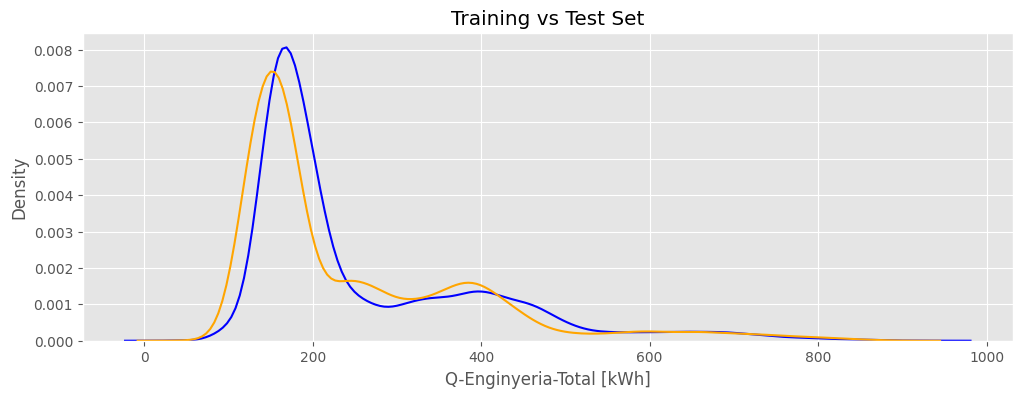

In [190]:
plt.figure(figsize=(12,4))
sns.kdeplot(data_train['Q-Enginyeria-Total [kWh]'], label  = "Training Set", color = "blue")
sns.kdeplot(data_test['Q-Enginyeria-Total [kWh]'], label  = "Test Set", color = "orange")
plt.xlabel("Q-Enginyeria-Total [kWh]")
plt.title("Training vs Test Set")

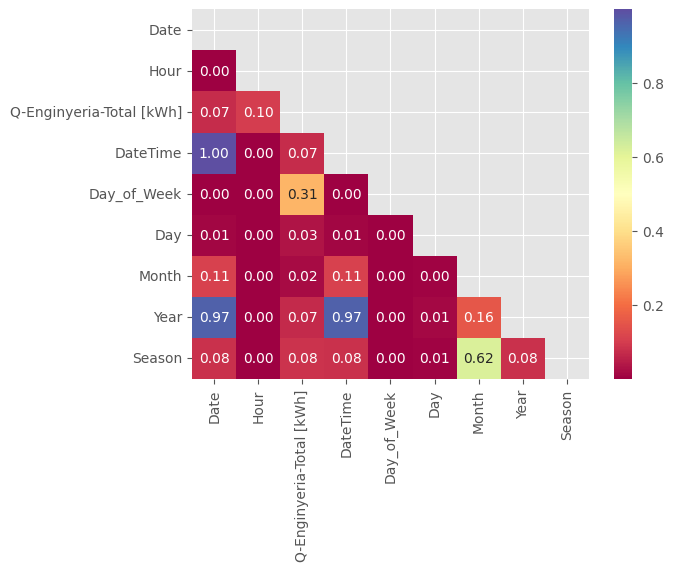

In [191]:
plt.figure()
correlations = data_train.corr().abs()
mask = np.triu(np.ones_like(correlations, dtype = "bool"))
sns.heatmap(correlations, annot = True, fmt = ".2f", cmap = "Spectral", mask = mask)
plt.show()

In [192]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

model_rf.fit(train_x, train_y)

<ipython-input-192-65635b6fee29>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(train_x, train_y)


RandomForestRegressor(random_state=42)

In [193]:
y_pred = model_rf.predict(test_x)

In [194]:
mse_train = mean_squared_error(test_y, y_pred)
print(f"Training set Mean Squared Error: {mse_train}")


Training set Mean Squared Error: 7079.225789362147


In [195]:
print(y_pred)

[179.271  179.9545 177.702  ... 424.7025 420.7596 410.3083]


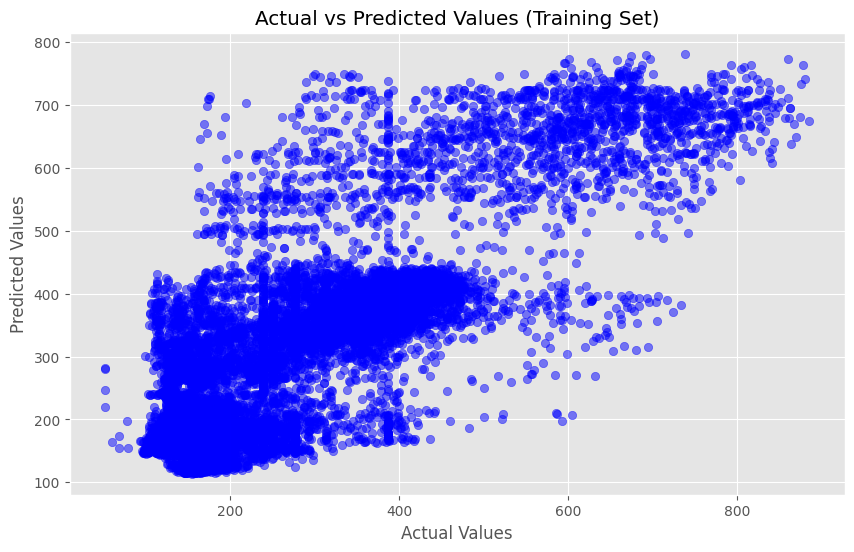

In [196]:
plt.figure(figsize=(10, 6))
plt.scatter(test_y, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.show()


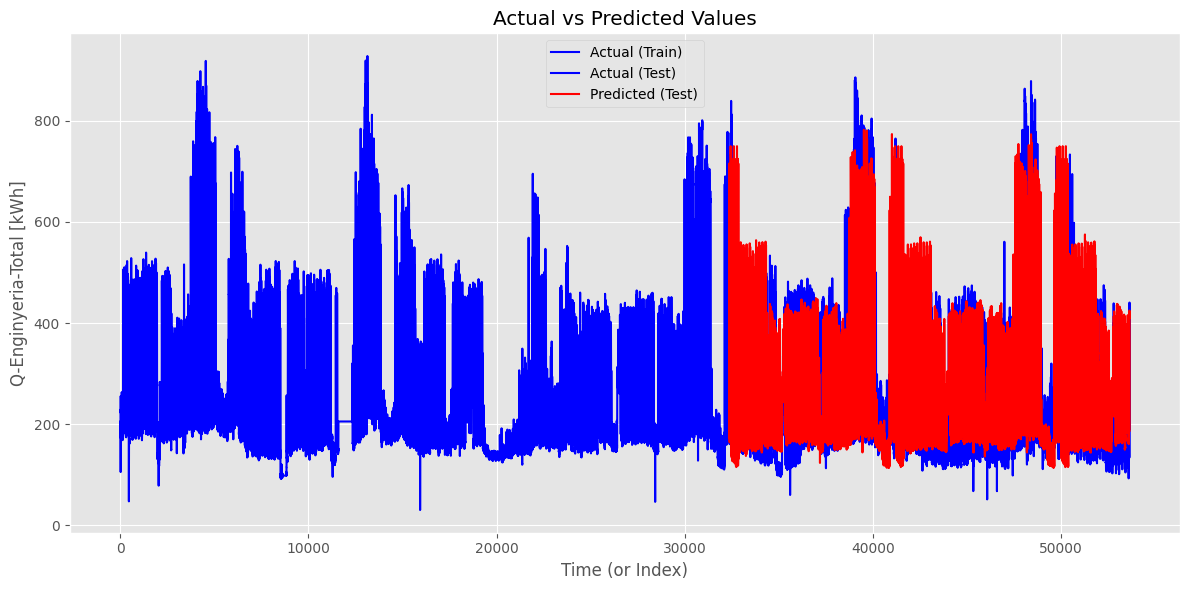

In [197]:
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Actual (Train)', color='blue')
plt.plot(test_y.index, test_y, label='Actual (Test)', color='blue')
plt.plot(test_y.index, y_pred, label='Predicted (Test)', color='red')
plt.xlabel('Time (or Index)')
plt.ylabel('Q-Enginyeria-Total [kWh]')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()